# Handwritten Digit Classifier

Complications with image classification:
- Each image is high dimensional 
- Images are often downsampled to lower resolations or transformed to grayscale
- Features from images don't have an obvious linear or nonlinear relationship

Exploring the effectiveness of deep, feedforward neural networks at classifying images.

In [1]:
from sklearn.datasets import load_digits
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
%matplotlib inline

In [2]:
digits = load_digits()
print(digits.data.shape)

(1797, 64)


## Previewing the Data

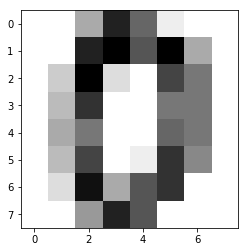

In [3]:
# Loading the data into a dataframe
digits_df = pd.DataFrame(digits.data)
digit_target = pd.Series(digits.target)

# Looking at the first row (image)
first_image =  digits_df.iloc[0]
np_image = first_image.values
# Reshaping to an 8x8 grid
np_image = np_image.reshape(8, 8)
plt.imshow(np_image, cmap='gray_r')

In [4]:
digits_df = pd.concat([digits_df, digit_target], axis=1)


In [5]:
def display_image(row):
    # Looking at the specified row (image)
    first_image =  digits_df.iloc[row, :64]
    np_image = first_image.values
    # Reshaping to an 8x8 grid
    np_image = np_image.reshape(8, 8)
    plt.imshow(np_image, cmap='gray_r') 

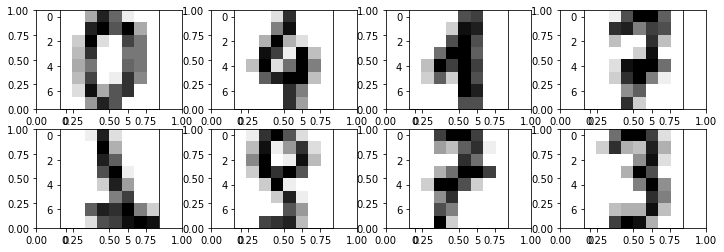

In [6]:
fig, axes = plt.subplots(2, 4, figsize = (12,4))

rows = [0, 100, 200, 300, 1000, 1100, 1200, 1300]

for i in range(8):
    ax = fig.add_subplot(2,4,i+1)
    display_image(rows[i])

## Testing K-Nearest Neighbor

In [7]:
# Function to split the data into train and test 
def split_data(df, split=0.7, seed=1):
    np.random.seed(seed)
    df_shuffled = df.iloc[np.random.permutation(len(df))]
    train = df_shuffled[:int(len(df)*split)]
    test = df_shuffled[int(len(df)*split):]
    return train, test

In [8]:
# Function to train the model
def train_model(train_X, train_y, k=5):
    knn = KNeighborsClassifier(n_neighbors=k)
    model = knn.fit(train_X, train_y)
    return model

In [9]:
# Function to test the model
def test_model(test_X, test_y, model):
    predictions = model.predict(test_X)
    accuracy = accuracy_score(test_y, predictions)
    return accuracy


In [10]:
train, test = split_data(digits_df)
train_X = train.iloc[:, :64]
train_y = train.iloc[:, 64]
test_X = test.iloc[:, :64]
test_y = test.iloc[:, 64]

model = train_model(train_X, train_y)

accuracy = test_model(test_X, test_y, model)
print(accuracy)

0.9814814814814815


In [11]:
# Function to cross validate the model 
def cross_validate(cv, k=5):
    accuracy = []
    for i in range(cv):
        train, test = split_data(digits_df, 0.8, i)
        train_X = train.iloc[:, :64]
        train_y = train.iloc[:, 64]
        test_X = test.iloc[:, :64]
        test_y = test.iloc[:, 64]
        model = train_model(train_X, train_y, k)
        accuracy.append(test_model(test_X, test_y, model))
    return np.mean(accuracy)

In [12]:
# Looking at different k values for k nearest neighbors
k_values = range(1, 21)

k_accuracy = {}

for k in k_values:
    k_accuracy[k] = cross_validate(4, k)


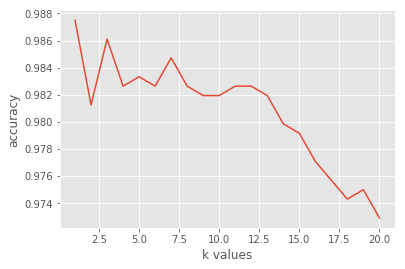

In [13]:
plt.style.use('ggplot')
pd.Series(k_accuracy).plot()
plt.xlabel('k values')
plt.ylabel('accuracy')
plt.show()

## Looking at MLP Classifier

In [124]:
neurons  = [8, 16, 32, 64, 128, 256]

# Function to train the model
def train_model_mlg(train_X, train_y, n=10):
    mlp = MLPClassifier(hidden_layer_sizes=(n,))
    model = mlp.fit(train_X, train_y)
    return model

# Function to cross validate the model 
def cross_validate_mlg(cv=4, n=100):
    accuracy = []
    for i in range(cv):
        train, test = split_data(digits_df, 0.8, i)
        train_X = train.iloc[:, :64]
        train_y = train.iloc[:, 64]
        test_X = test.iloc[:, :64]
        test_y = test.iloc[:, 64]
        model = train_model_mlg(train_X, train_y, n)
        accuracy.append(test_model(test_X, test_y, model))
    return np.mean(accuracy)

In [120]:
train, test = split_data(digits_df)
train_X = train.iloc[:, :64]
train_y = train.iloc[:, 64]
test_X = test.iloc[:, :64]
test_y = test.iloc[:, 64]

model = train_model_mlg(train_X, train_y)

accuracy = test_model(test_X, test_y, model)
print(accuracy)

0.9111111111111111


/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


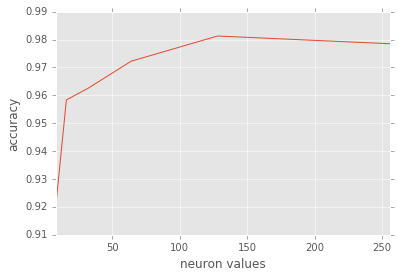

In [ ]:
n_accuracy = {}

for n in neurons:
    n_accuracy[n] = cross_validate_mlg(4, n)
    
pd.Series(n_accuracy).plot()
plt.xlabel('neuron values')
plt.ylabel('accuracy')
plt.show()

## Two hidden layers

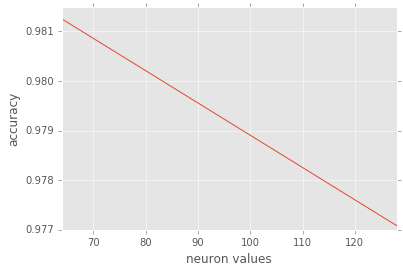

In [ ]:
# Function to train the model
def train_model_mlg2(train_X, train_y, n=100):
    mlp = MLPClassifier(hidden_layer_sizes=(n, n))
    model = mlp.fit(train_X, train_y)
    return model

# Function to cross validate the model 
def cross_validate_mlg2(cv=4, n=100):
    accuracy = []
    for i in range(cv):
        train, test = split_data(digits_df, 0.8, i)
        train_X = train.iloc[:, :64]
        train_y = train.iloc[:, 64]
        test_X = test.iloc[:, :64]
        test_y = test.iloc[:, 64]
        model = train_model_mlg2(train_X, train_y, n)
        accuracy.append(test_model(test_X, test_y, model))
    return np.mean(accuracy)

n_accuracy2 = {} 
for n in [64, 128]:
    n_accuracy2[n] = cross_validate_mlg2(4, n)
    
pd.Series(n_accuracy2).plot()
plt.xlabel('neuron values')
plt.ylabel('accuracy')
plt.show()

## Three hidden layers

C:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


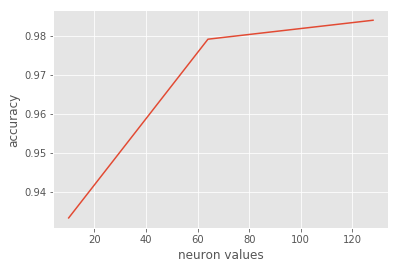

In [14]:
# Function to train the model
def train_model_mlg3(train_X, train_y, n=100):
    mlp = MLPClassifier(hidden_layer_sizes=(n, n, n))
    model = mlp.fit(train_X, train_y)
    return model

# Function to cross validate the model 
def cross_validate_mlg3(cv=4, n=100):
    accuracy = []
    for i in range(cv):
        train, test = split_data(digits_df, 0.8, i)
        train_X = train.iloc[:, :64]
        train_y = train.iloc[:, 64]
        test_X = test.iloc[:, :64]
        test_y = test.iloc[:, 64]
        model = train_model_mlg3(train_X, train_y, n)
        accuracy.append(test_model(test_X, test_y, model))
    return np.mean(accuracy)

n_accuracy3 = {} 
for n in [10, 64, 128]:
    n_accuracy3[n] = cross_validate_mlg3(4, n)
    
pd.Series(n_accuracy3).plot()
plt.xlabel('neuron values')
plt.ylabel('accuracy')
plt.show()

The maximum accuracy for both the k-nearest neighbor classifier and the MLP classifer was about 0.98. The advantage of chosing the neural network MLP classifier verses the k-nearest neighbor classifier is scalability.  K-nearest neighbor classifier stores the entire data set in the model, which can cause memory issues with larger datasets.  

# Future Work

- Look at other models, such as Decision Trees. 
- Try grid search for hyperparamater optimization.  